In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# DECISION TREES

## Criterion


to split the vertice, one should maximize the following error functional:

$$
Q(R_m) = H(R_m) - ( \frac{R_l}{R_m} H(R_l) + \frac{R_r}{R_m} H(R_r))
$$

$H(R)$ - any information content, for example entropy:

$$
H(R) = - \sum_{k=1}^K p_k \log{p_k}
$$

or Gini impurity

$$
H(R) = - \sum_{k=1}^K p_k (1-{p_k})
$$

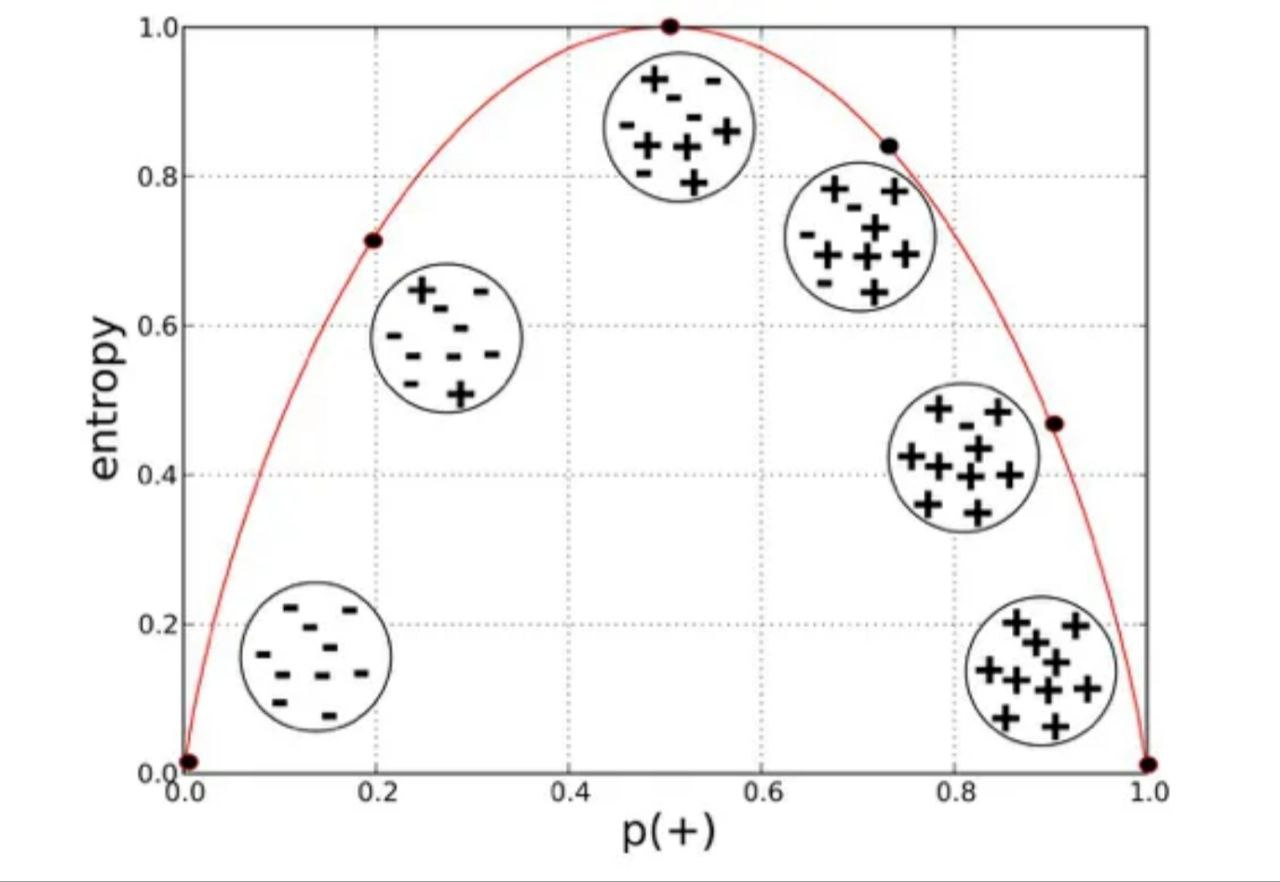

# LET US DRAW DECISION TREE FOR IRIS DATASET

In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
clf = DecisionTreeClassifier(random_state=1234, criterion = "entropy")
model = clf.fit(X, y)


text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

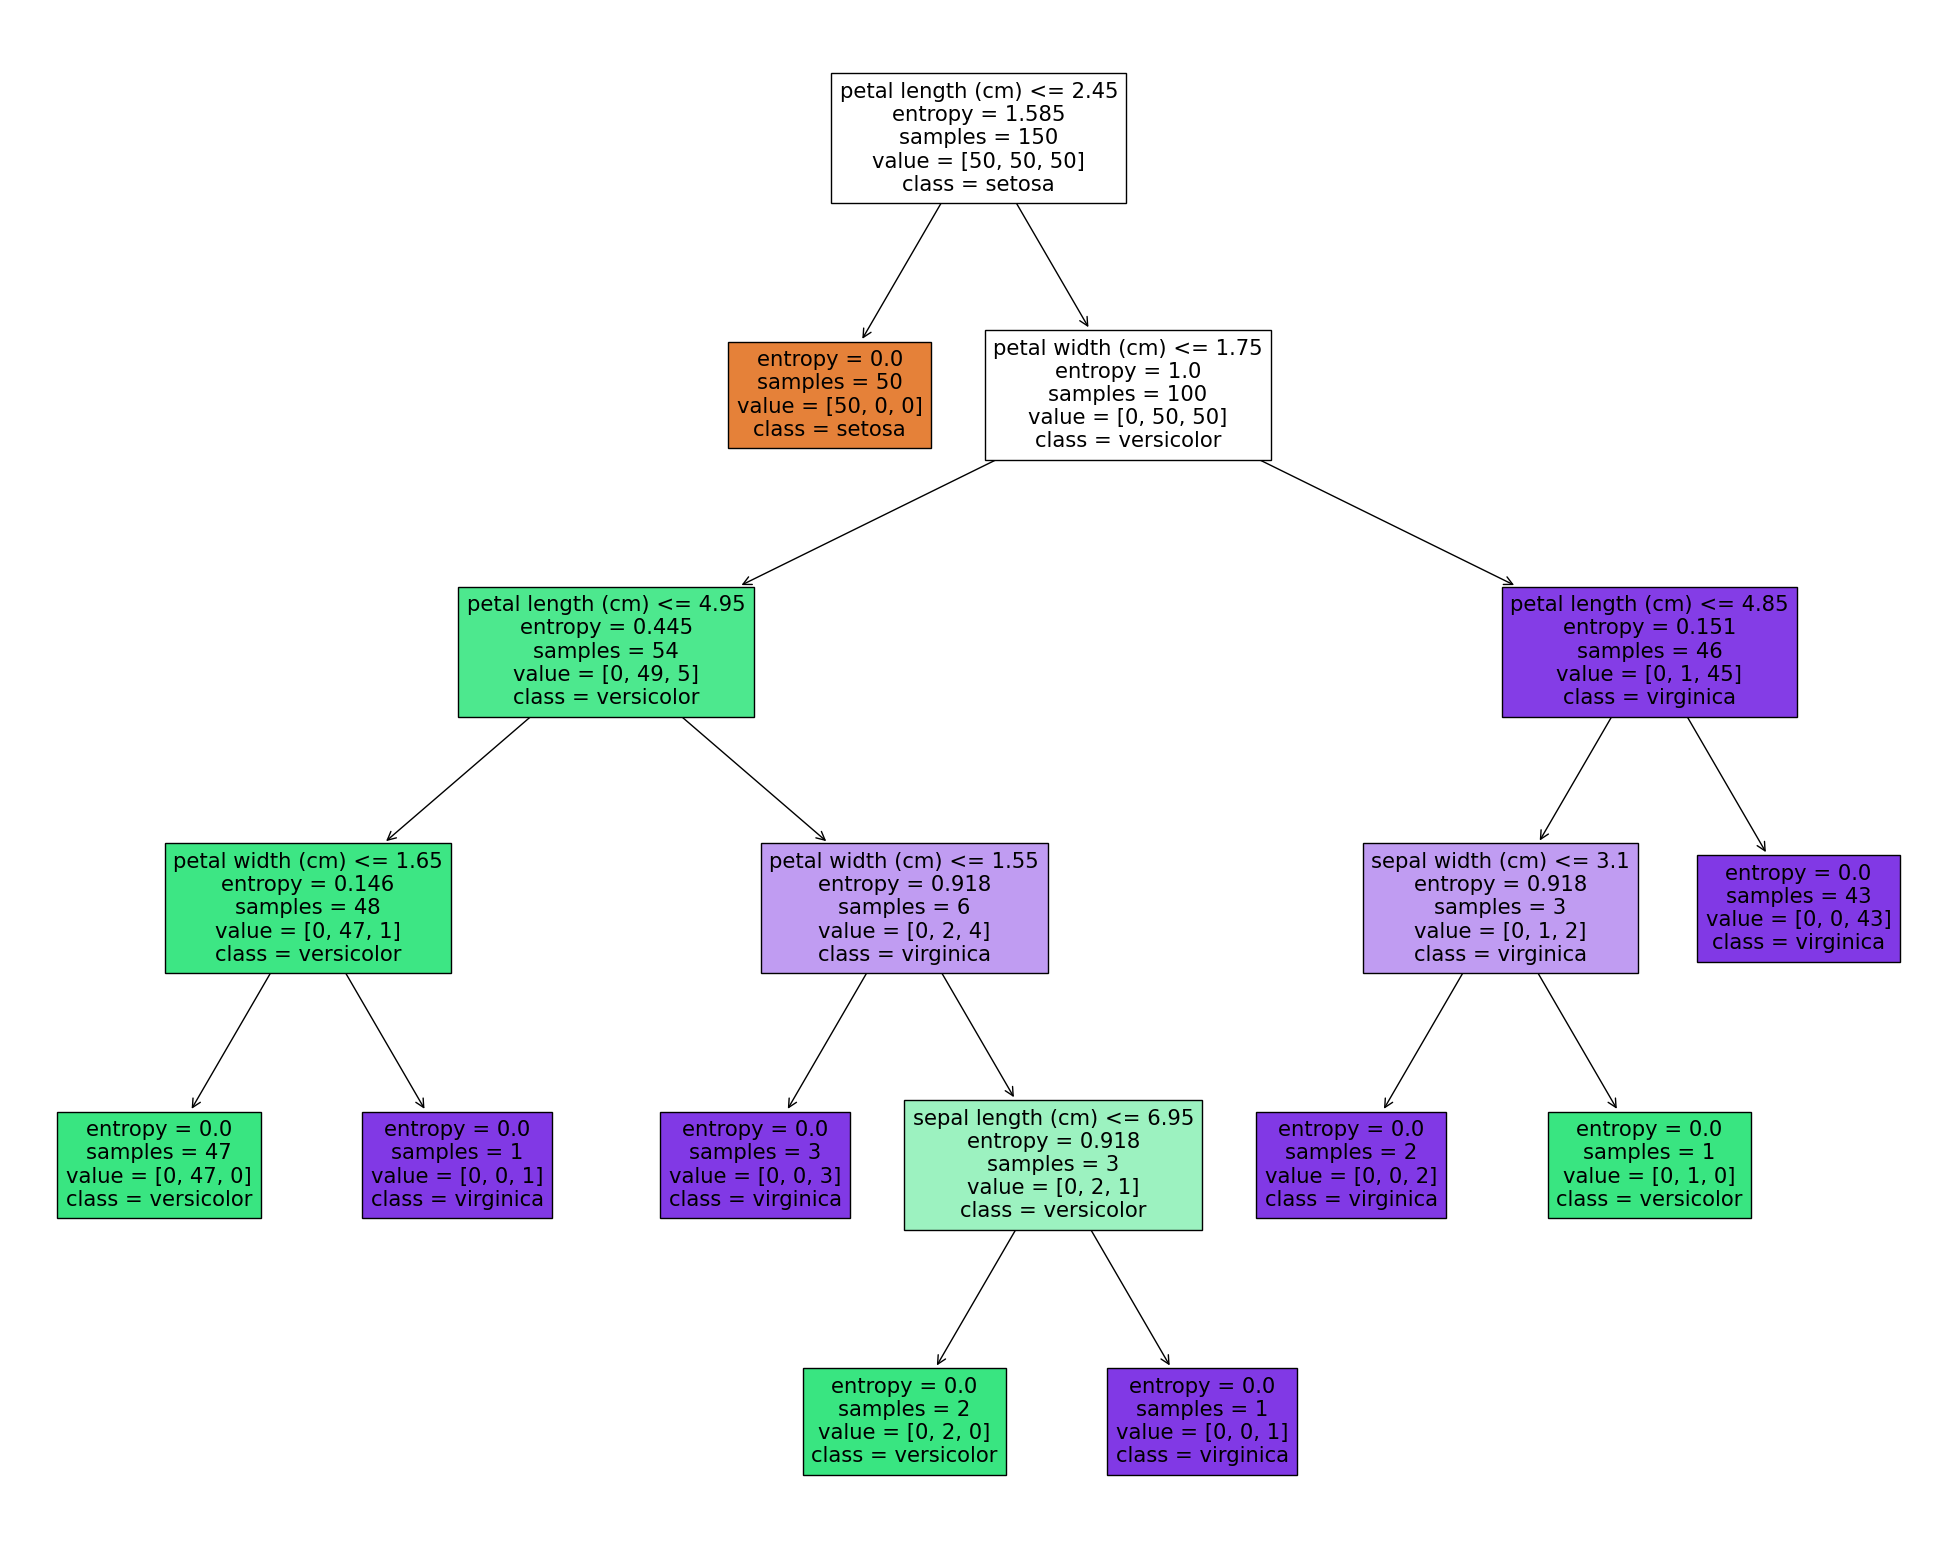

In [ ]:

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True)

# SPAM/HAM CLASSIFIFCATION

In [ ]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string

import numpy as np
import pandas as pd

#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import numpy as np
import plotly.graph_objs as go
from sklearn.manifold import TSNE


from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
from nltk.tokenize import WordPunctTokenizer

COLORS = ['aliceblue', 'darkkhaki',  'linen','darkmagenta', 'darkolivegreen',  'orchid' , 'honeydew', 'mediumblue','antiquewhite', 'mediumturquoise''gray', 'grey', 'green', 'aqua', 'aquamarine', 'azure']

##DOWNLOAD SPAM/HAM DATASET

In [ ]:
df = pd.read_csv('drive/MyDrive/spam.csv', encoding='latin-1')
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [ ]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df = df.replace(['ham','spam'],[0, 1])

In [ ]:
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## BIT OF  PREPROCESSING

In [ ]:

df["v2_lower"] = df["v2"].str.lower()
df.drop('v2', axis=1, inplace=True)
df.head()

,v1,v2_lower
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


## BALANCING DATASET

In [ ]:
indx = np.random.choice(df[df.v1  == 0].index.values, 747, replace=False)

In [ ]:
df.iloc[indx]

,v1,v2_lower
786,0,it does it on its own. most of the time it fix...
21,0,iû÷m going to try for 2 months ha ha only joking
4183,0,i just really need shit before tomorrow and i ...
3127,0,would u fuckin believe it they didnt know i ha...
4163,0,"its ok, called mom instead have fun"
...,...,...
3093,0,have you emigrated or something? ok maybe 5.30...
1490,0,cant believe i said so many things to you this...
3574,0,and do you have any one that can teach me how ...
3782,0,can you do online transaction?


In [ ]:
df_balanced = pd.concat([df[df.v1==1],df.iloc[indx]])

In [ ]:
df_balanced.v1.sum()/len(df_balanced)

0.5

# HOW TO REPRESENT A TEXT? WORD2VEC

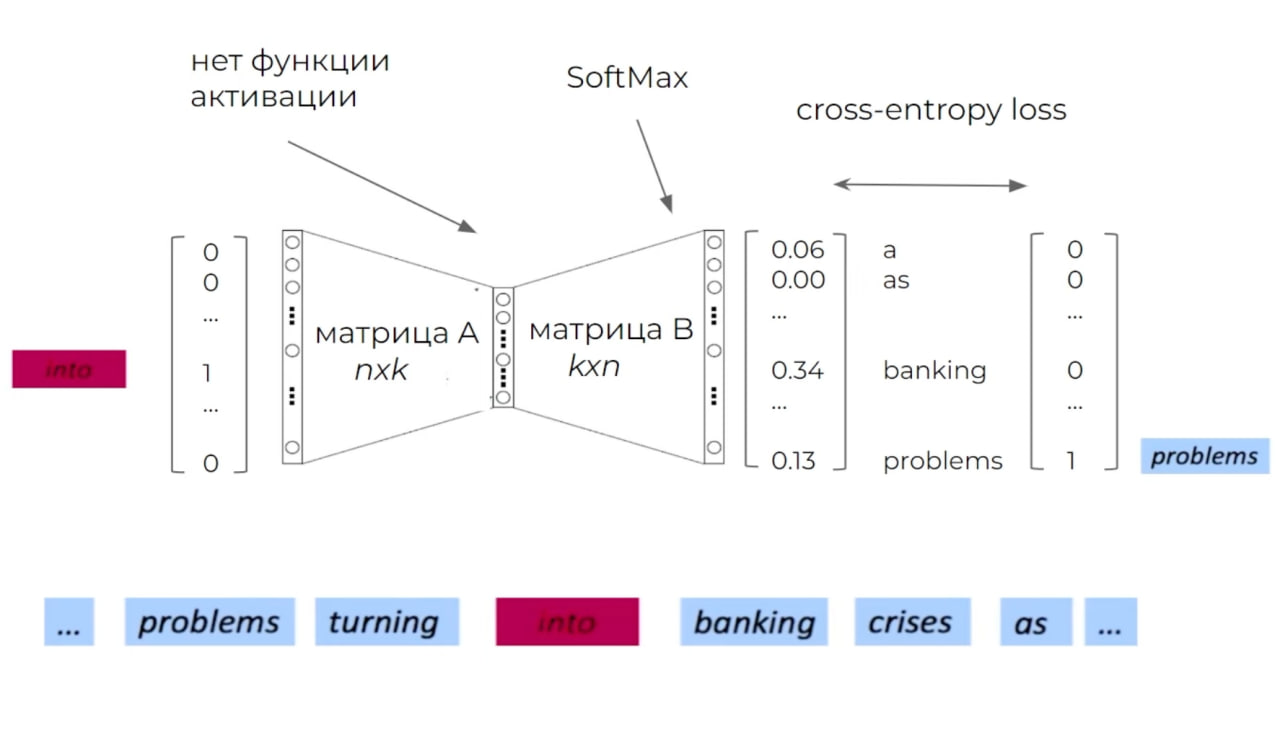

## LET US DRAW FAMOUS KING-QUEEN EXAMPLE

#### We won't train word2vec. Instead, we'll just download existing pretrained model

We take quora dataset

In [ ]:


# download the data:
!wget https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1 -O ./quora.txt


--2024-04-17 15:38:54--  https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.13.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.13.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/obaitrix9jyu84r/quora.txt [following]
--2024-04-17 15:38:54--  https://www.dropbox.com/s/dl/obaitrix9jyu84r/quora.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc630e6c497c901516b49b790bac.dl.dropboxusercontent.com/cd/0/get/CRPAuxeR7c9fBJ2tVwA9Fugz3yfAJ33Qq9Ja70A7UooT_cJMVunlpt6HfnM5eZup8VD9UfwOJlUGLrezPzEzhGSbgrU8ZqXHvqwLha6bCfjfoxZqSjPnjeqhh6Se7f7SF20/file?dl=1# [following]
--2024-04-17 15:38:55--  https://uc630e6c497c901516b49b790bac.dl.dropboxusercontent.com/cd/0/get/CRPAuxeR7c9fBJ2tVwA9Fugz3yfAJ33Qq9Ja70A7UooT_cJMVunlpt6HfnM5eZup8VD9UfwOJlUGLrezPzEzhGSbgrU8ZqXHvqwLha6bCfjfoxZqSjPnjeqhh6Se7f7S

In [ ]:


data = list(open("./quora.txt", encoding="utf-8"))
data[23]

'What does entertainment mean for you?\n'

#### We tokenize our data

In [ ]:

tokenizer = WordPunctTokenizer()

print(tokenizer.tokenize(data[23]))

['What', 'does', 'entertainment', 'mean', 'for', 'you', '?']


In [ ]:
data_tok = [tokenizer.tokenize(sent.lower()) for sent in data]

#### WE initialize our model with tokenized data

In [ ]:
w2v_model = Word2Vec(data_tok,
                 min_count=5,
                 window=5,
                     sg=0).wv

In [ ]:
w2v_model.most_similar('woman', topn=10)

[('man', 0.8890140056610107),
 ('guy', 0.8405644297599792),
 ('girl', 0.8182979822158813),
 ('boy', 0.8005650043487549),
 ('person', 0.7539656162261963),
 ('women', 0.7129485607147217),
 ('female', 0.677093505859375),
 ('baby', 0.675613522529602),
 ('child', 0.6674870252609253),
 ('narcissist', 0.666695237159729)]

In [ ]:
w2v_model.get_vector('woman')

array([ 0.39275613,  0.08191694,  0.5215237 , -2.5063484 , -1.7626661 ,
       -0.23928158, -0.983522  ,  1.3052666 , -0.40677348, -2.1036541 ,
       -1.3930207 ,  0.97902983,  1.2013352 ,  0.30028206, -0.1801062 ,
       -0.62980324, -1.8245941 , -1.6425754 , -1.644009  , -1.4301524 ,
        1.6382413 , -3.1576416 , -0.49108538, -1.2702787 , -0.28011197,
        1.5643884 ,  0.06047893, -3.2642996 ,  0.7074415 ,  0.38525134,
        0.14656876,  0.7876541 , -2.328285  ,  0.83910304,  3.2983649 ,
       -0.44810665, -0.01516407, -1.8714433 , -0.83067334,  2.2791996 ,
       -0.11785222,  2.0886424 , -0.23999724,  1.1900105 , -0.47144327,
       -2.3164032 ,  1.260332  ,  0.37019363,  0.03056595,  1.5415078 ,
       -0.28179824, -0.0986638 ,  0.19542582, -0.81963843, -0.96328515,
        1.1399486 , -0.55203605,  0.13806131,  0.17155877, -1.0918641 ,
       -0.35243756, -1.3917061 , -0.45016265,  0.11730067, -2.2086468 ,
        3.1654065 ,  1.2762223 ,  1.6663226 ,  3.0007071 , -3.79

#### Let us loook at similarities

In [ ]:
vecs_w2v = [w2v_model.get_vector('man'), w2v_model.get_vector('woman'),  w2v_model.get_vector('king'), w2v_model.get_vector('queen')]

#### Look at the cosines of vectors $woman$ and $queen$ and $king-man+woman$

$$
\frac{vec1 @ vec2}{\|vec1\|\|vec2\|}
$$

In [ ]:
|...

0.61196464

In [ ]:
...

0.28554535

### PCA our vectors

In [ ]:

pca = PCA(n_components=3)
pca.fit(vecs_w2v)
X_pca = pca.transform(vecs_w2v)

#### And plot PCA'd vectors in 3d

In [ ]:

fig = go.Figure([go.Scatter3d(x=X_pca[:2,:][:, 0], y=X_pca[:2,:][:, 1],z=X_pca[:2,:][:, 2], mode='lines',text=['king','queen'], line=dict(
                                      color='olive',
                                      width=8)),
go.Scatter3d(x=X_pca[:2,:][1:2, 0], y=X_pca[:2,:][1:2, 1],z=X_pca[:2,:][1:2, 2], mode='markers',text=['queen'], marker={'size': 7,
              'opacity': 1,
              'color': 'olive',
              'symbol' : 'diamond'}  ),
              go.Scatter3d(x=X_pca[2:,:][:, 0], y=X_pca[2:,:][:, 1],z=X_pca[2:,:][:, 2], mode='lines', text=['man','woman'],line=dict(
                                      color='powderblue',
                                      width=8)),
go.Scatter3d(x=X_pca[2:,:][1:2, 0], y=X_pca[2:,:][1:2, 1],z=X_pca[2:,:][1:2, 2], mode='markers', text=['woman'], marker={'size': 7,
              'opacity': 1,
              'color': 'powderblue',
              'symbol' : 'diamond'}  )])

In [ ]:
fig.show()

In [ ]:
pca2d = PCA(n_components=2)
pca2d.fit(vecs_w2v)
X_pca = pca2d.transform(vecs_w2v)

In [ ]:

fig = go.Figure([
                  go.Scatter(x=X_pca[:2,:][:, 0], y=X_pca[:2,:][:, 1], mode='lines', text=['king','queen'], line=dict(
                                      color='olive',
                                      width=3)),
                  go.Scatter(x=X_pca[:2,:][1:2, 0], y=X_pca[:2,:][1:2, 1], mode='markers', text=['queen'],marker={'size': 7,
                                'opacity': 1,
                                'color': 'olive',
                                'symbol' : 'diamond'}  ),

                  go.Scatter(x=X_pca[2:,:][:, 0], y=X_pca[2:,:][:, 1], mode='lines', text=['man','woman'],line=dict(
                                                        color='powderblue',
                                                        width=3)),
                  go.Scatter(x=X_pca[2:,:][1:2, 0], y=X_pca[2:,:][1:2, 1], mode='markers', text=['woman'],marker={'size': 7,
                                'opacity': 1,
                                'color': 'powderblue',
                                'symbol' : 'diamond'}  )
                  ])

In [ ]:
X_pca

array([[ 6.04531983,  3.532668  ],
       [ 7.76706186, -3.08848533],
       [-7.14235741,  0.69942279],
       [-6.67002429, -1.14360547]])

In [ ]:
fig.show()

Voila!  We can see that we've got very promotional picture of word2vec!
But let's get back to the task

### In this part we will train our tree to predict whether our sentence is spam or not.

But word2vec is about single word's embedding. What is to be done?


In [ ]:
X_train, X_test , y_train, y_test = train_test_split(df_balanced["v2_lower"].values, df_balanced["v1"].values, shuffle=True)

In [ ]:
X_train

array(['if i said anything wrong sorry de:-)',
       'haha just kidding, papa needs drugs',
       'sexy singles are waiting for you! text your age followed by your gender as wither m or f e.g.23f. for gay men text your age followed by a g. e.g.23g.',
       ..., 'u calling me right? call my hand phone...',
       'ur balance is now å£600. next question: complete the landmark, big, a. bob, b. barry or c. ben ?. text a, b or c to 83738. good luck!',
       'white fudge oreos are in stores'], dtype=object)

#### We ll just sum up and normalize embeddig of each word in a sentence

In [ ]:
X_train_sentences = []
for sentence in X_train:
  sentence_emb = 0
  for word in sentence.split():
    try:
      sentence_emb += w2v_model.get_vector(word)
    except KeyError:
      sentence_emb  += w2v_model.get_vector('unknown')


  X_train_sentences.append(sentence_emb/len(sentence))

In [ ]:
X_test_sentences = []
for sentence in X_test:
  ...
  X_test_sentences.append(sentence_emb/len(sentence))

## Train, fit, rocauc score

In [ ]:
clf = DecisionTreeClassifier(random_state=1234, criterion='entropy')
model = clf.fit(X_train_sentences,y_train)


In [ ]:
y_preds = model.predict_proba(X_test_sentences)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_preds[:, 1])

0.8882699210337401

# CLASSIFIERS SUMMARY


In [ ]:
from sklearn.datasets import make_moons, make_circles

def make_sunny_moons(n_sun=50, n_moons=100, noise=0.0, sun_radius=1.9, theta=None):
    X_moons, y_moons = make_moons(n_samples=n_moons, noise=noise)
    if not n_sun:
        return X_moons, y_moons

    np.random.seed(0xBEEFBAD)
    angles = np.arange(0, 2 * np.pi, 2 * np.pi / n_sun)
    X_sun = sun_radius * np.column_stack([np.cos(angles), np.sin(angles)]) + np.array([0.5, 0.25])
    X_sun += np.random.normal(scale=noise, size=X_sun.shape)
    y_sun = 2 * np.ones(n_sun)

    X = np.vstack([X_moons, X_sun])
    y = np.concatenate([y_moons, y_sun]).astype(int)
    X -= X.mean(axis=0)

    if theta is None:
        theta = np.pi / 4
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    X = X @ R

    return X, y

X, y = make_sunny_moons(n_sun=150, n_moons=300, noise=0.15)

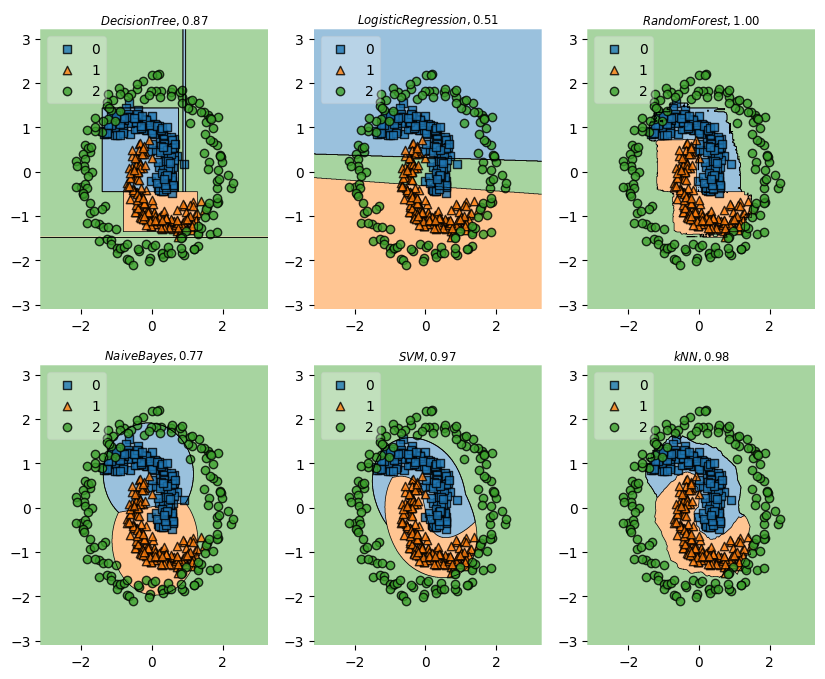

In [ ]:
import mlxtend
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf0 = ...

clf1 = ...
clf2 = ...
clf3 = ...
clf4 = ...
clf5 = ...

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(10,8))

labels = ['Decision Tree  ','Logistic Regression  ', 'Random Forest  ', 'Naive Bayes  ', 'SVM ', 'kNN ']
for clf, lab, grd in zip([clf0, clf1, clf2, clf3, clf4, clf5],
                         labels,
                         itertools.product([0, 1,2], repeat=2)):

    clf...
    ax = plt.subplot(gs[grd[0], grd[1]])
    a = ...
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title('$_{'+str(lab)+ ', ' + str('{:.2f}'.format(a))+'}$')

plt.show()

#. TASK 2

## data preprocessing

In [ ]:
df = pd.read_csv('drive/MyDrive/spam.csv', encoding='latin-1')
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [ ]:
df = df.replace(['ham','spam'],[0, 1])
df["v2_lower"] = df["v2"].str.lower()
df.drop('v2', axis=1, inplace=True)
df.head()

,v1,v2_lower
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [ ]:
len(df[df.v1==0]), len(df[df.v1==1])

(4825, 747)

## DATASET BALANCING

In [ ]:
df_neg = df[df.v1==0].sample(n=747, random_state=1)
df_pos = df[df.v1==1]
df_balanced = pd.concat([df_neg, df_pos])
df_balanced.v1.sum() / len(df_balanced)

0.5

## DOC2VEC

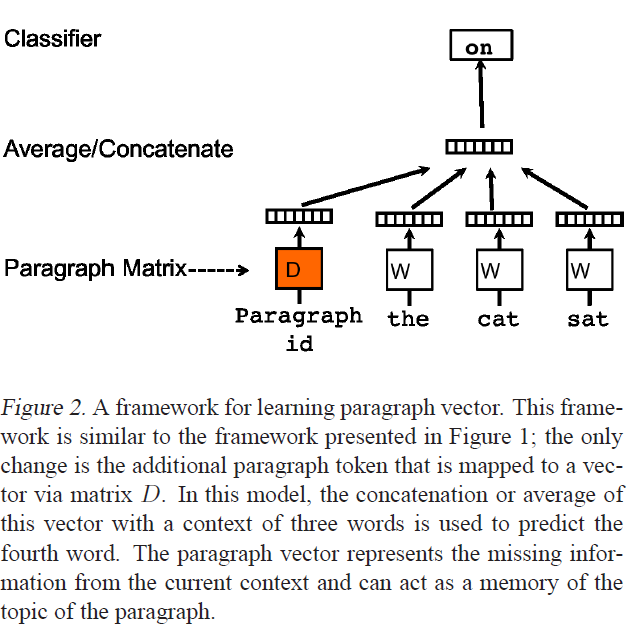

In [ ]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df_balanced["v2_lower"].values)]
model = Doc2Vec(documents, vector_size=40, window=2, min_count=1, workers=4)

In [ ]:
X_d2v = np.concatenate([model.dv[i].reshape(1, -1) for i in range( 1494)])
X_train, X_test, y_train, y_test = ...

# CLASSIFIERS

In [ ]:
import seaborn as sns

In [ ]:
clf0 = tree.DecisionTreeClassifier(random_state=1, max_depth=5)

clf1 = LogisticRegression(random_state=1,
                          solver='newton-cg',)
clf2 = RandomForestClassifier(random_state=1, n_estimators=100)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto', probability = True)
clf5 = KNeighborsClassifier(n_neighbors=3)

In order to compute roc curve one must compute:
$$
TPR = \frac{TP}{P}
$$

$$
FPR = \frac{FP}{N}
$$

where $P$ is number of objects of class $1$, $N$ is number of objects of class $0$, $TP$ the amount of the objects of class $1$ that were classified as class $1$ and $TFP$ the amount of the objects of class $0$ that were classified as class $1$

$TPR$ and $FPR$ depend on the threshold  so, in order to construct the roc-curve one must compute $TPR$ and $FPR$ for different thresholds.

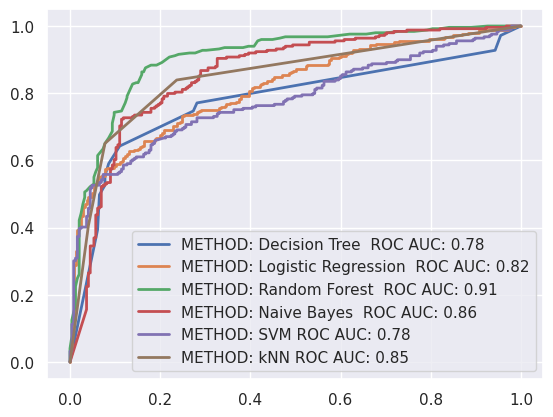

In [ ]:
sns.set()
for clf, label in zip([clf0, clf1, clf2, clf3, clf4, clf5], labels):
  clf....

  y_pred =....
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred[:, 1])
  roc_auc = metrics.auc(fpr, tpr)
  plt.plot(fpr, tpr, lw = 2, label ='METHOD: {}'.format(label) + 'ROC AUC: {:.2f}'.format(roc_auc))
plt.legend()
plt.show()
